 ST1502 DAVI CA2 Assignment Source File

 Name: Lee Hong Yi

 Admin Number: 2223010
 
 Class: DAAA/FT/1B/05

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd #run with pip install geopandas
import plotly as px
import plotly.graph_objects as go
from shapely.geometry import Point, Polygon

In [10]:
bus_routes = pd.read_csv("./data/bus_routes.csv", dtype = {"BusStopCode":"object"})
bus_services = pd.read_csv("./data/bus_services.csv")
bus_stops = pd.read_csv("./data/bus_stops.csv", dtype = {"BusStopCode":"object"})

In [11]:
uniqueRoute = bus_routes.drop_duplicates(subset = "ServiceNo", keep = "last")
uniqueService = bus_services.drop_duplicates(subset = "ServiceNo", keep = "first")
print(f"There are {uniqueRoute.shape[0]} unique services in uniqueRoute, with {uniqueRoute.shape[1]} fields of data.")
print(f"There are {uniqueService.shape[0]} unique services in uniqueServices, with {uniqueService.shape[1]} fields of data.")

There are 555 unique services in uniqueRoute, with 13 fields of data.
There are 555 unique services in uniqueServices, with 12 fields of data.


In [12]:
cleanbus_routes = bus_routes[["ServiceNo","Operator","Direction","StopSequence","BusStopCode","Distance"]]
# cleanbus_routes["BusStopCode"] = cleanbus_routes["BusStopCode"].astype("string")
cleanbus_stops = bus_stops[["BusStopCode","Latitude","Longitude"]]
# cleanbus_stops["BusStopCode"] = cleanbus_stops["BusStopCode"].astype("string")

geoBusRoute = cleanbus_routes.merge(cleanbus_stops, on = "BusStopCode")
geoBusRoute = geoBusRoute.sort_values(by = ["ServiceNo","StopSequence"])

[]

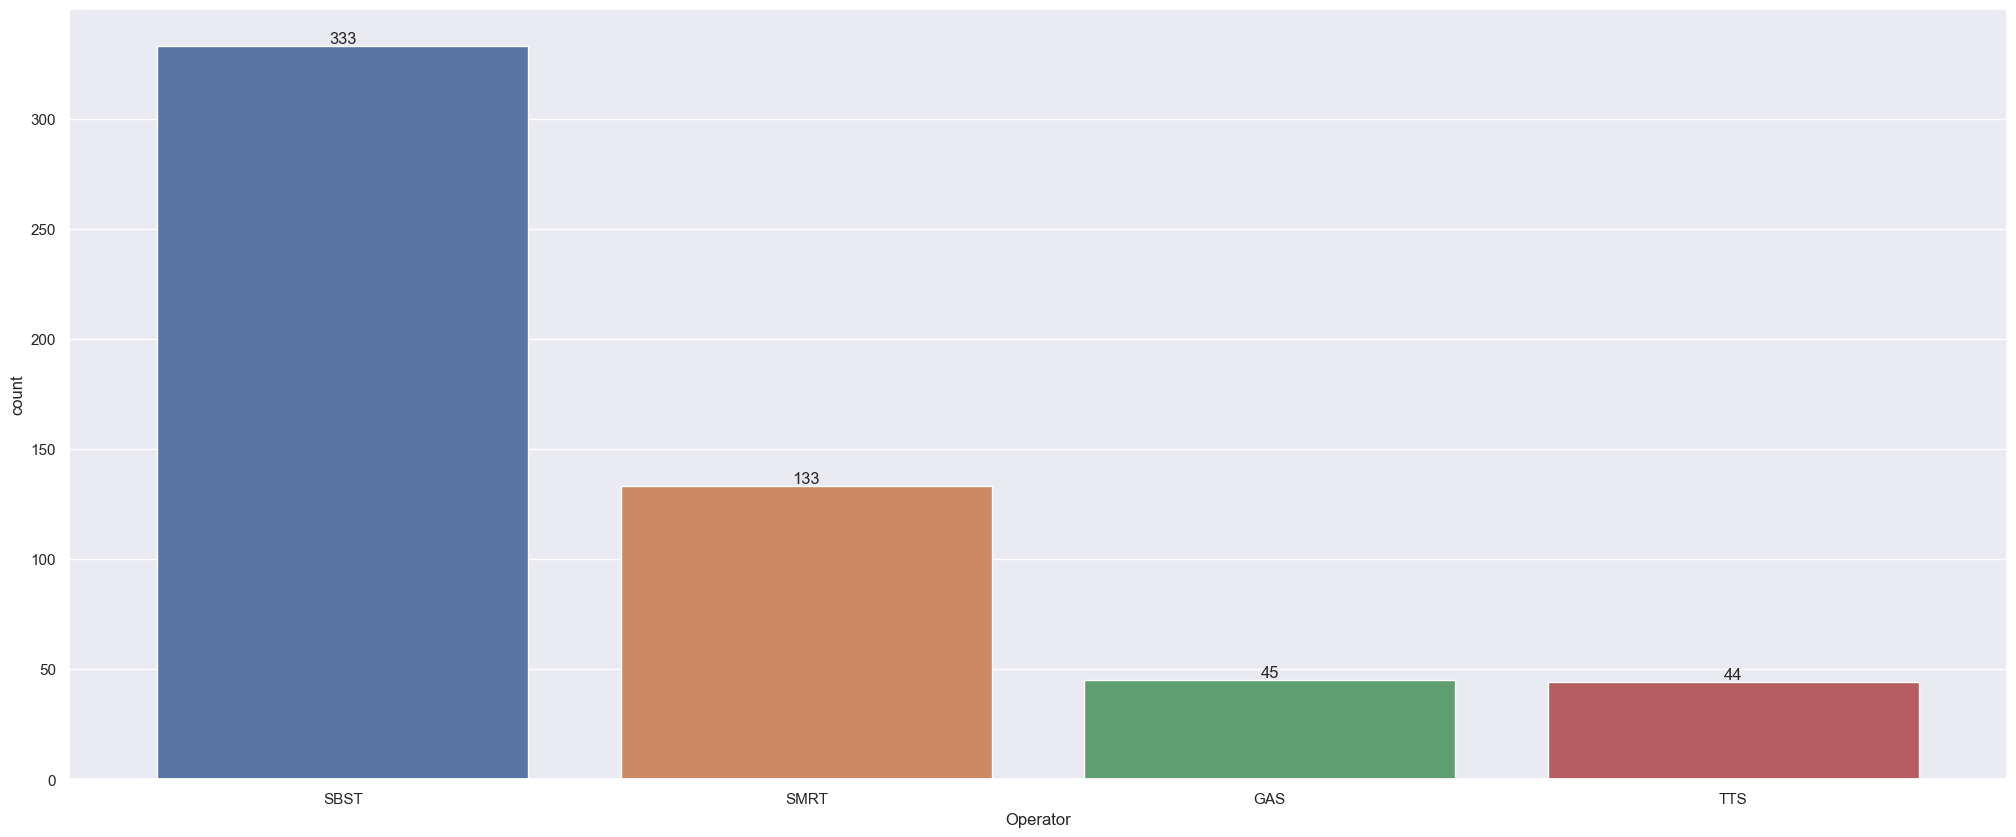

In [13]:
ax = sns.countplot(data=uniqueRoute, x='Operator', order=bus_routes['Operator'].value_counts().index)
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style()
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.plot()

<Figure size 2000x500 with 0 Axes>

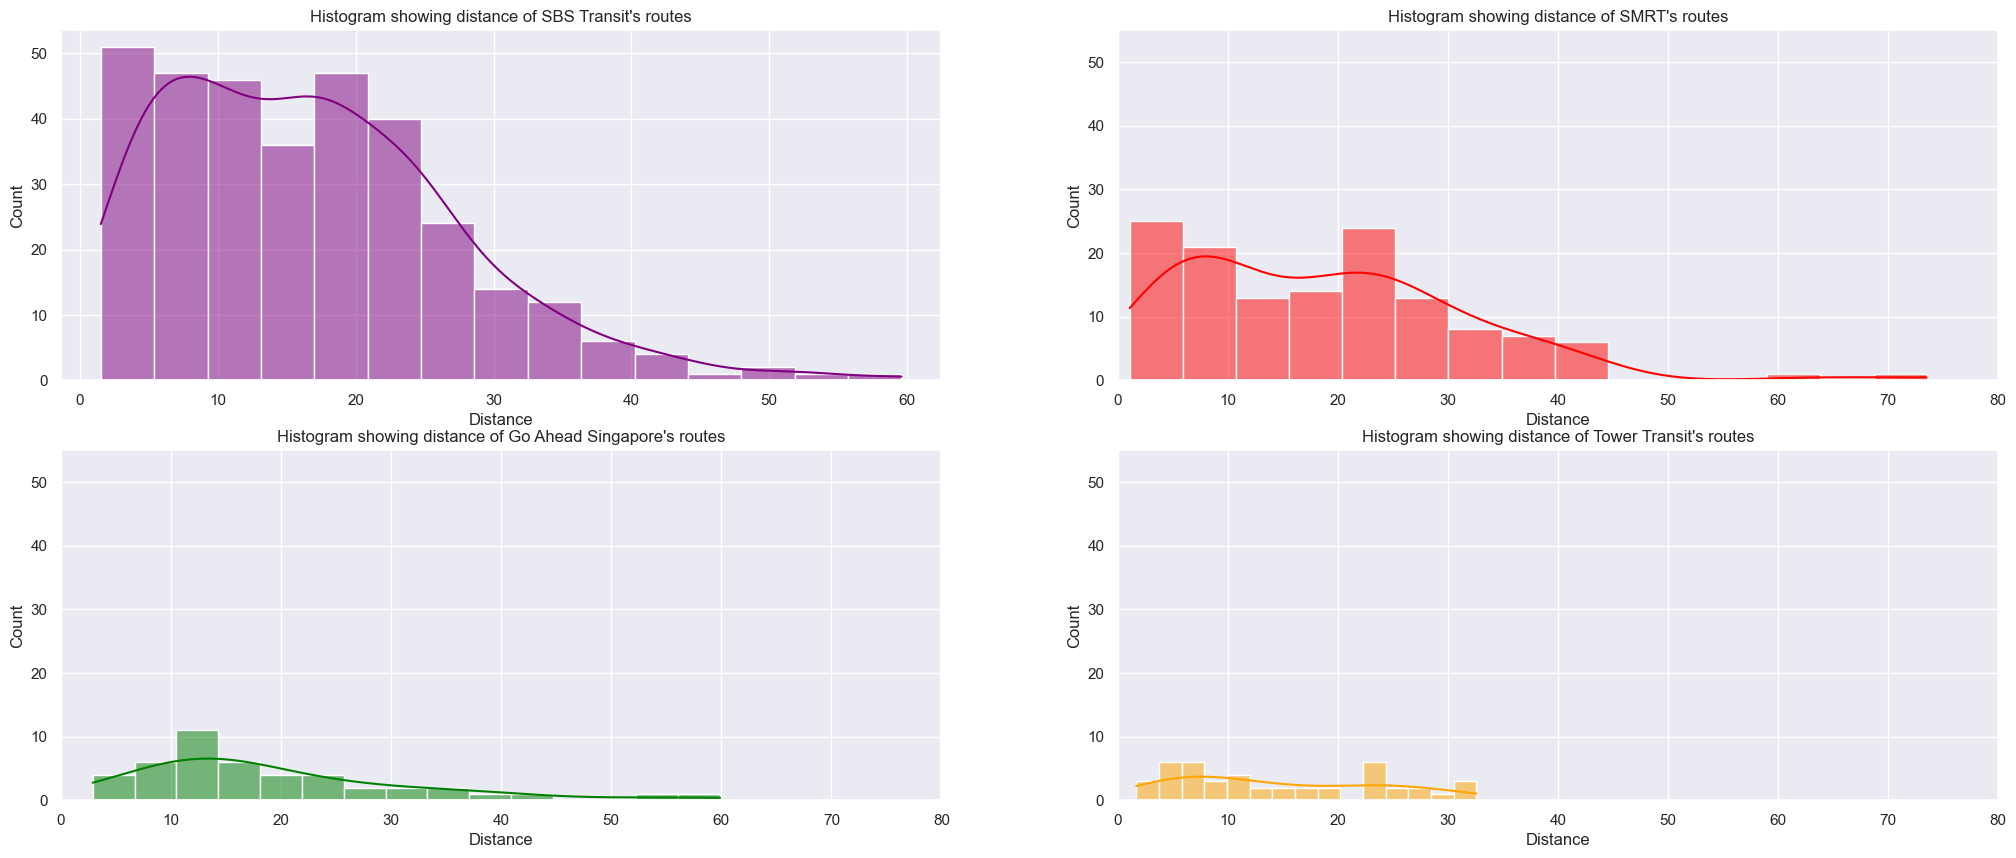

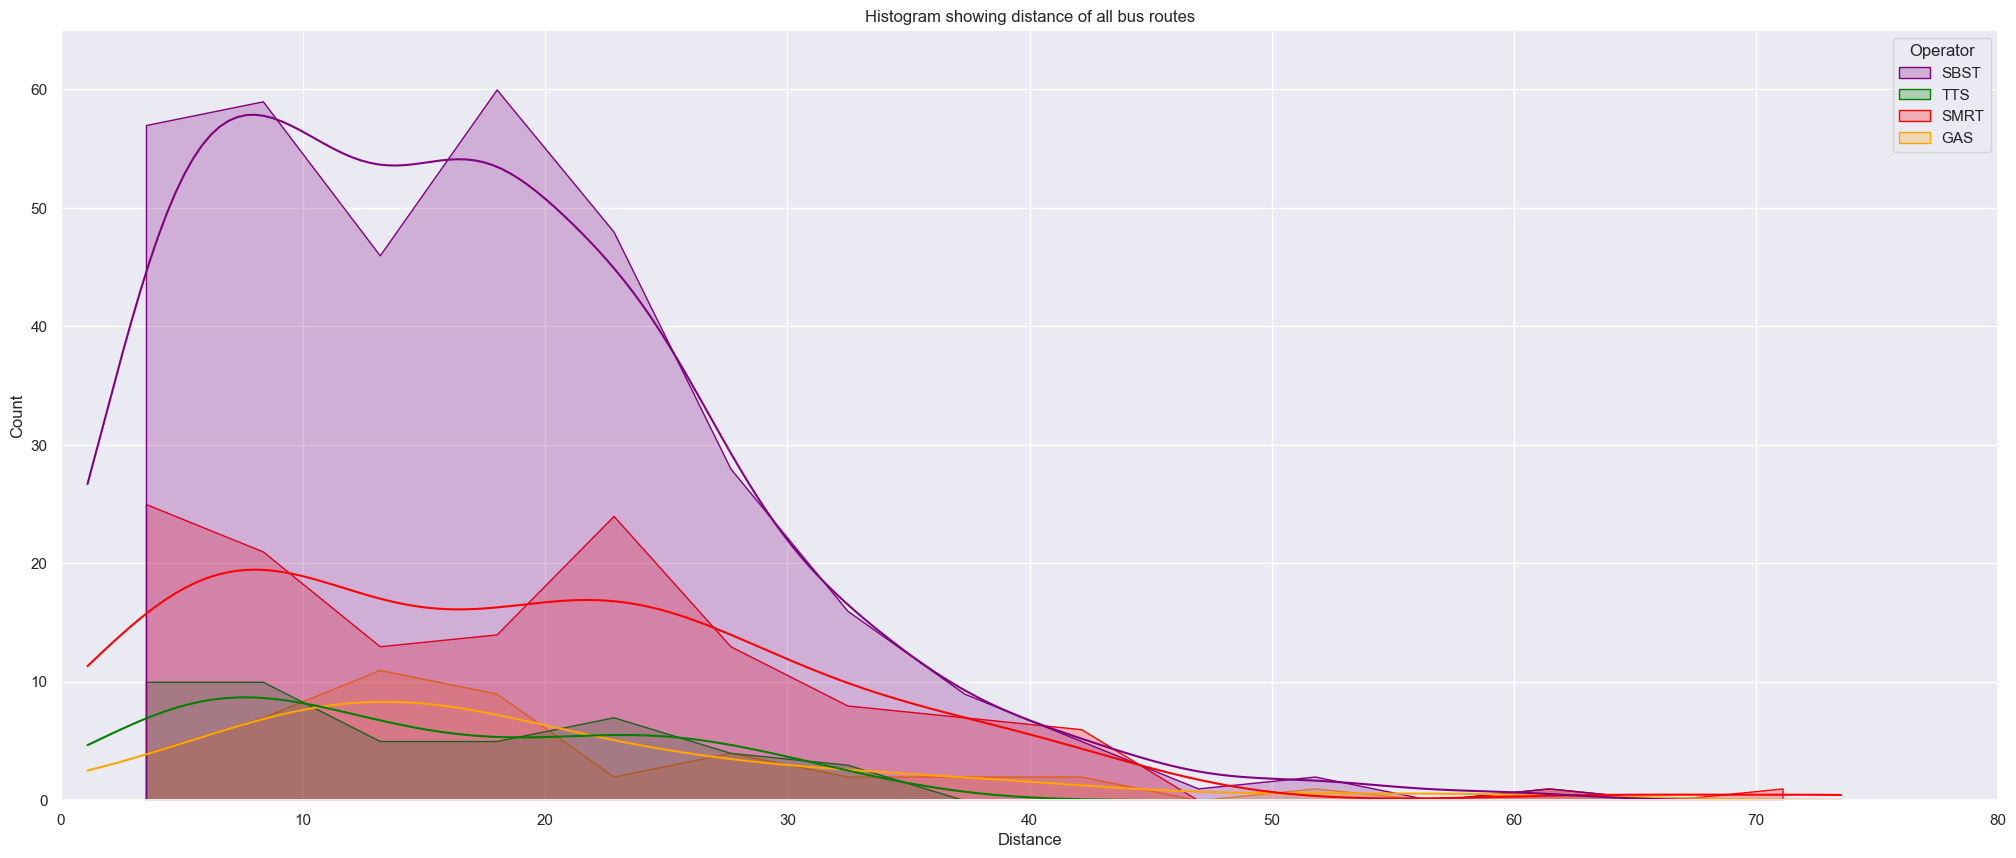

In [20]:
buscolor = ["purple","green","red","orange"]

plt.figure(1, figsize = (20,5))
fig,ax = plt.subplots(2,2)
plt.subplot(2,2,1)
ax[0,0] = sns.histplot(data = uniqueRoute[uniqueRoute["Operator"] == "SBST"], x = "Distance", kde = True, color = buscolor[0], bins = 15)
ax[0,0].set_title("Histogram showing distance of SBS Transit's routes")
# ax[0,0].axis([0,80,0,55])

plt.subplot(2,2,2)
ax[0,1] = sns.histplot(data = uniqueRoute[uniqueRoute["Operator"] == "SMRT"], x = "Distance", kde = True, color = buscolor[2], bins = 15)
ax[0,1].set_title("Histogram showing distance of SMRT's routes")
ax[0,1].axis([0,80,0,55])

plt.subplot(2,2,3)
ax[1,0] = sns.histplot(data = uniqueRoute[uniqueRoute["Operator"] == "GAS"], x = "Distance", kde = True, color = buscolor[1], bins = 15)
ax[1,0].set_title("Histogram showing distance of Go Ahead Singapore's routes")
ax[1,0].axis([0,80,0,55])

plt.subplot(2,2,4)
ax[1,1] = sns.histplot(data = uniqueRoute[uniqueRoute["Operator"] == "TTS"], x = "Distance", kde = True, color = buscolor[3], bins = 15)
ax[1,1].set_title("Histogram showing distance of Tower Transit's routes")
ax[1,1].axis([0,80,0,55])


plt.figure(2, figsize =(20,5))
fig, ax2 = plt.subplots(1,1)
ax2 = sns.histplot(data = uniqueRoute, x = "Distance", hue = "Operator", kde = True, palette = buscolor, bins = 15, element = "poly")
ax2.axis([0,80,0,65])

#print(uniqueRoute.shape)
ax2.set_title("Histogram showing distance of all bus routes")
ax2.plot()

plt.show()

[]

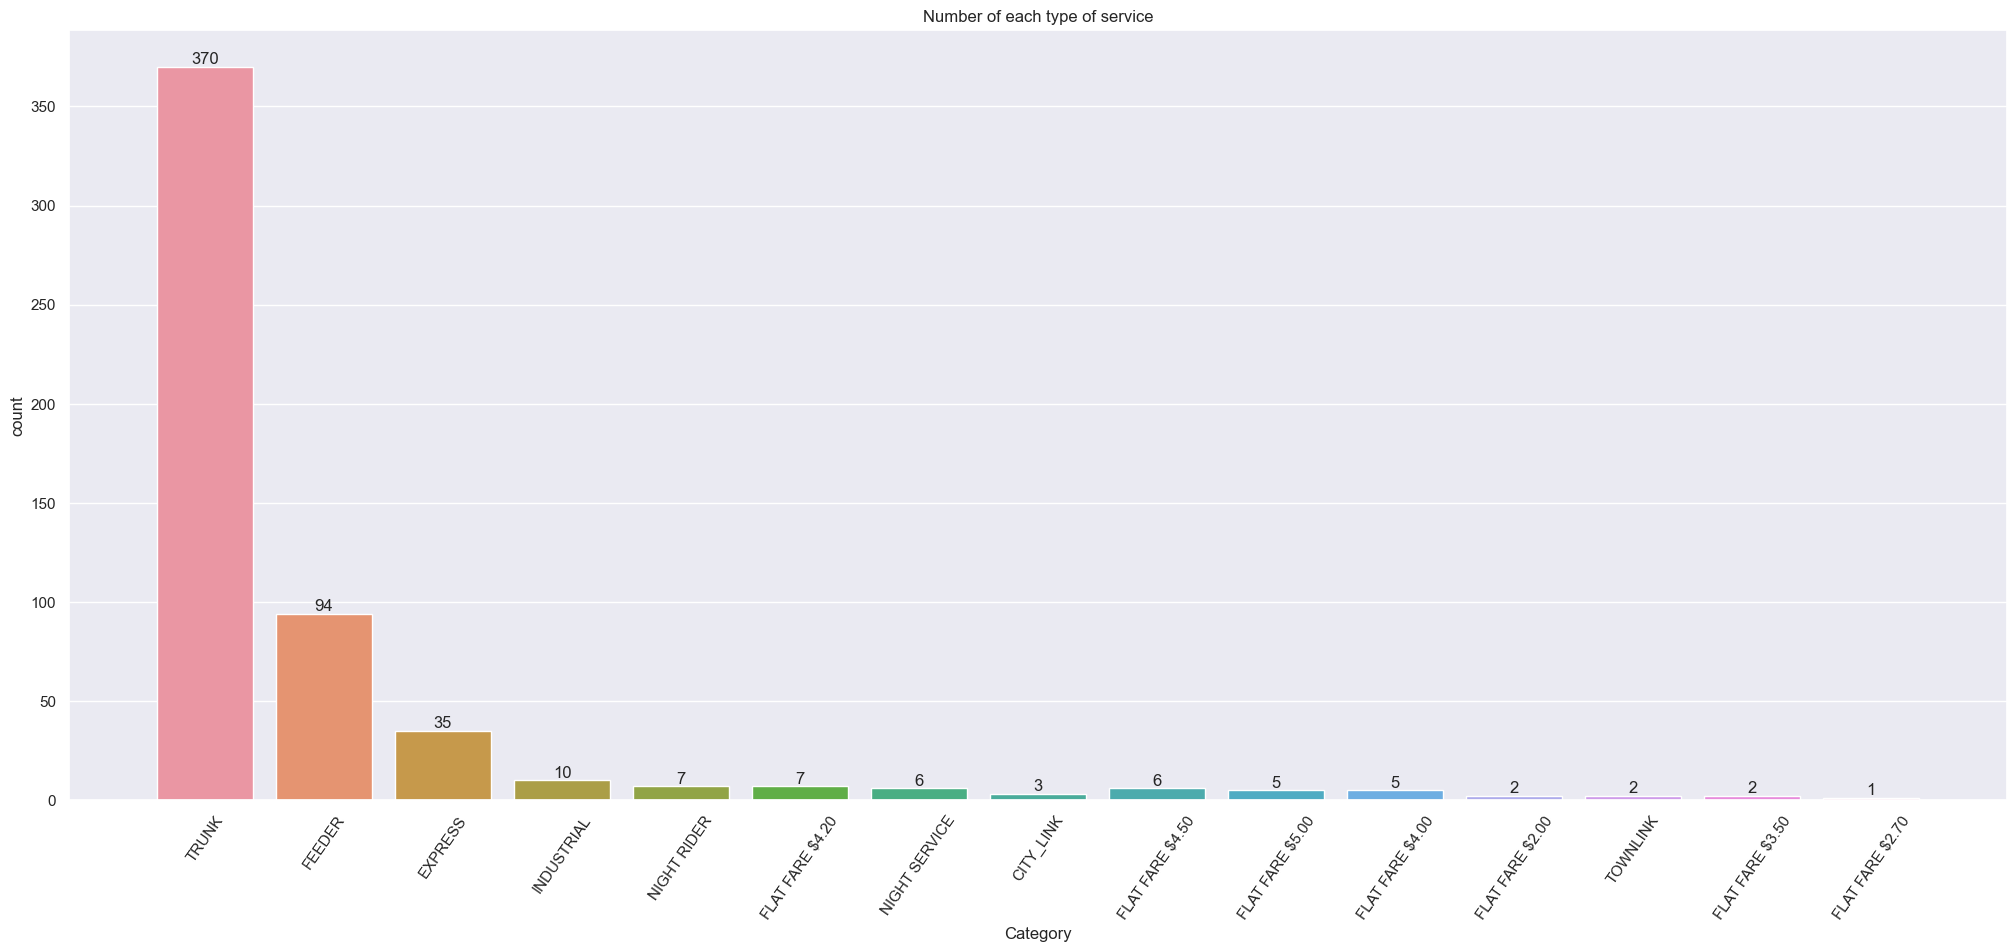

In [15]:
ax = sns.countplot(data=uniqueService, x='Category', order=bus_services['Category'].value_counts().index)
sns.set(rc={'figure.figsize':(25,10)})
ax.set_title("Number of each type of service")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 55)
ax.bar_label(ax.containers[0])
ax.plot()

In [16]:
# targetBus = input("What bus would you like to look for?")
mask = (geoBusRoute["ServiceNo"] == targetBus) & (geoBusRoute["Direction"] == 1)
routeToPlot = geoBusRoute
locationArray = routeToPlot[["Latitude","Longitude"]]

#code to plot map. do not touch.
crs='epsg:4326'
geometry=[Point(xy) for xy in zip(locationArray["Longitude"], locationArray["Latitude"])]
gpLocArray = gpd.GeoDataFrame(locationArray, crs = crs, geometry = geometry)
# sf = "../region-census-2010/region-census2010-shp.zip"
sf = "../stanford-pg798kr1205-shapefile.zip"
singaporeShape = gpd.read_file(sf)
fig, ax = plt.subplots(figsize=(50,50)) 
singaporeShape.plot(ax = ax, color = "black")
gpLocArray.plot(ax = ax, color = "red",  markersize = 5)
ax.plot()

NameError: name 'targetBus' is not defined

In [ ]:
uniqueService

,Unnamed: 0,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,0,118,GAS,1,TRUNK,65009.0,97009.0,06-08,08-15,10-12,11-15,NaN
2,2,118A,GAS,1,TRUNK,65199.0,96119.0,14-16,-,-,-,NaN
3,3,118B,GAS,1,TRUNK,96111.0,65191.0,-,-,30,-,NaN
4,4,119,GAS,1,TRUNK,65009.0,65009.0,16-08,18-12,17-12,15-17,Hougang St 21
5,5,12,GAS,1,TRUNK,77009.0,10499.0,9,09-14,9-10,11-13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,588,SMRT,1,FLAT FARE $4.00,53369.0,3218.0,-,-,-,-,NaN
723,723,589,SMRT,1,FLAT FARE $4.00,17429.0,3011.0,-,-,-,-,NaN
724,724,590,SMRT,1,FLAT FARE $5.00,45421.0,3218.0,10,-,-,-,NaN
725,725,598,SMRT,1,FLAT FARE $5.00,44859.0,3218.0,10,-,-,-,NaN
